# Support Vector Machines with Python
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.

**The advantages of support vector machines are:**

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also   possible to specify custom kernels.


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()


In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [6]:
df= pd.DataFrame(cancer['data'], columns= cancer[ 'feature_names'])


In [7]:
df['Cancer']= cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df['Cancer'] = df.Cancer.apply(lambda x: 'C' if x == 0 else 'NC')
df.Cancer.value_counts()


NC    357
C     212
Name: Cancer, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius


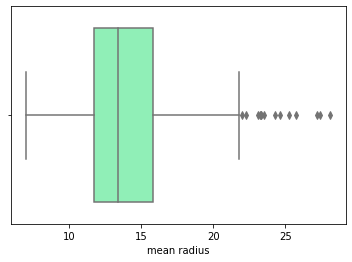

mean texture


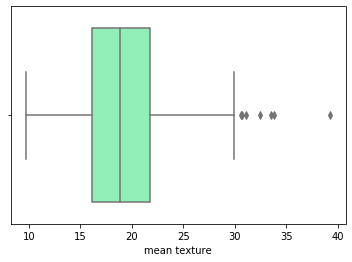

mean perimeter


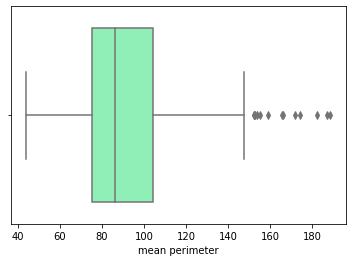

mean area


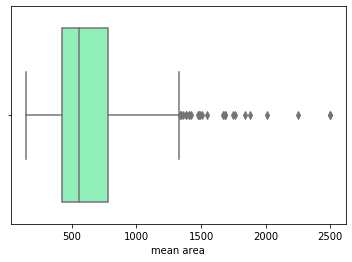

mean smoothness


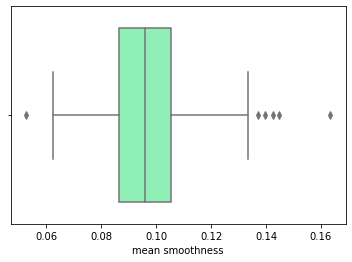

mean compactness


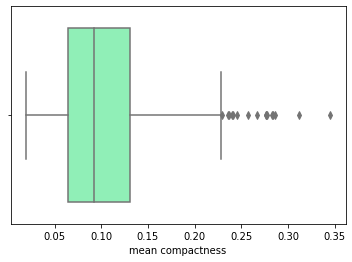

mean concavity


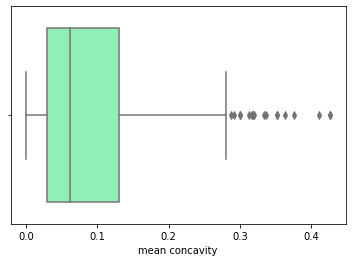

mean concave points


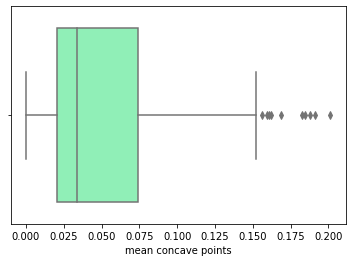

mean symmetry


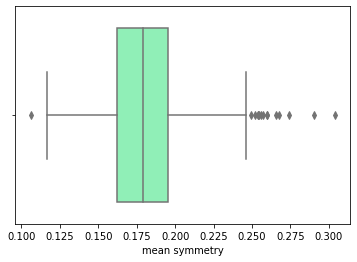

mean fractal dimension


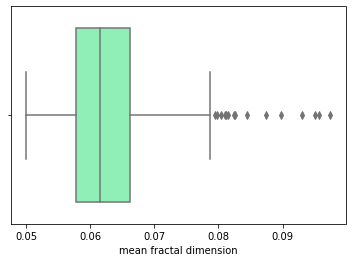

radius error


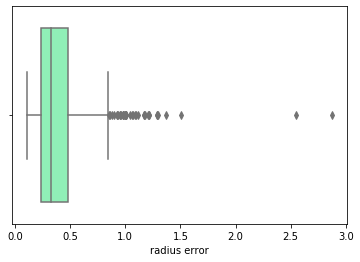

texture error


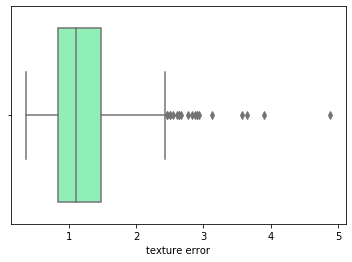

perimeter error


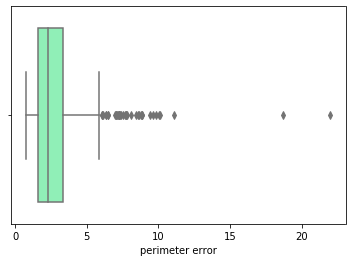

area error


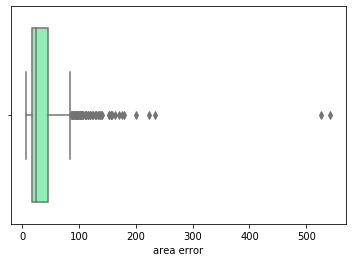

smoothness error


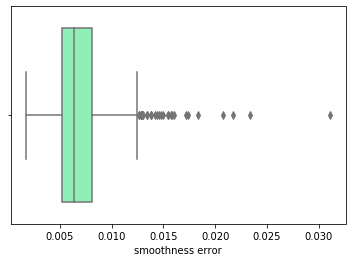

compactness error


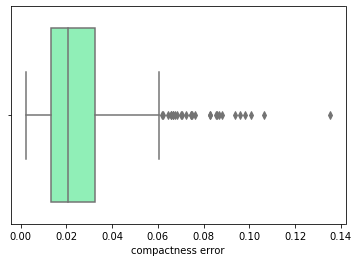

concavity error


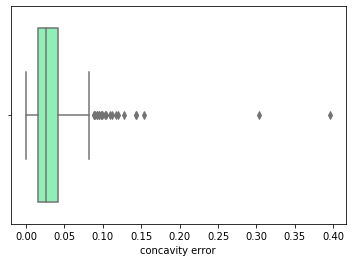

concave points error


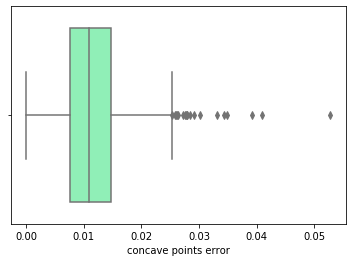

symmetry error


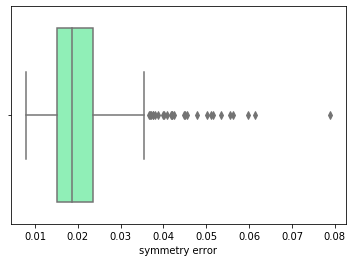

fractal dimension error


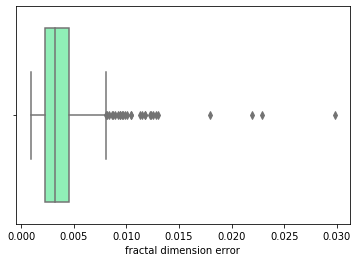

worst radius


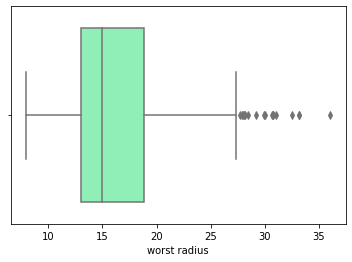

worst texture


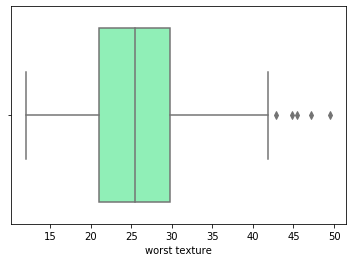

worst perimeter


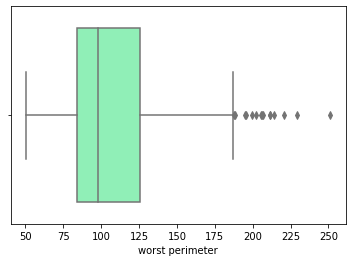

worst area


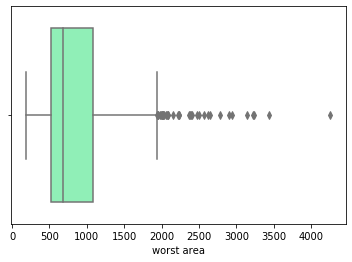

worst smoothness


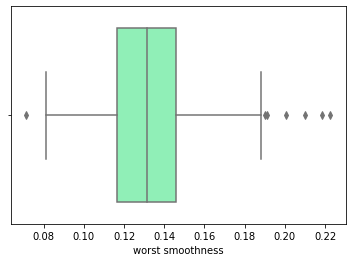

worst compactness


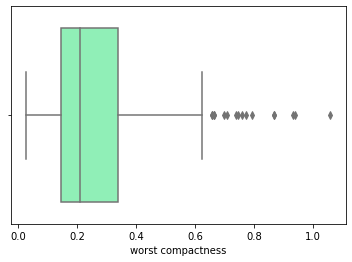

worst concavity


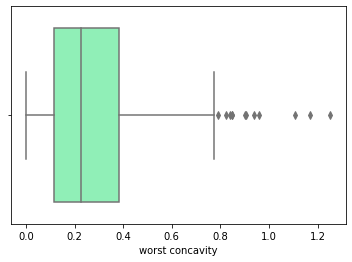

worst concave points


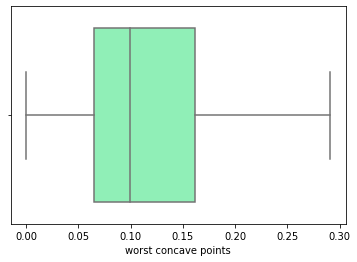

worst symmetry


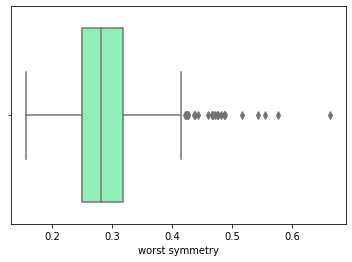

worst fractal dimension


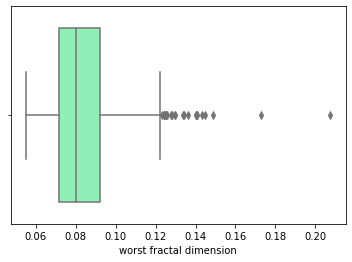

Cancer


TypeError: unsupported operand type(s) for /: 'str' and 'int'

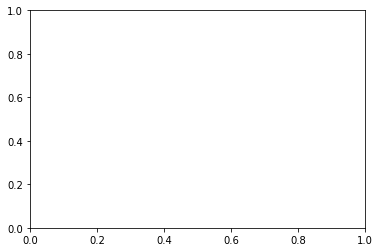

In [10]:
for var in df.columns:
    print(var)
    sns.boxplot(df[var], data=df, palette= 'rainbow')
    plt.show()

In [ ]:
def outlier_treat(df):
    for i in df.columns: 
        if df[i].dtype == int or df[i].dtype == float:
            q1, q3 = np.percentile(df[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            df[i] = df[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)

            
outlier_treat(df)

In [11]:
df['Cancer'] = df.Cancer.apply(lambda x: 0 if x == 'NC' else 1)
df.Cancer.value_counts()


0    357
1    212
Name: Cancer, dtype: int64

1 IS CANCER,
0 IS NON CANCER

In [13]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [14]:
df1=df.corr()
imp_features = df1['Cancer'][(df1['Cancer']>0.65) | (df1['Cancer']<-0.65) ].index
final_data=df[imp_features]


In [15]:
final_data
print(imp_features)

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points', 'Cancer'],
      dtype='object')


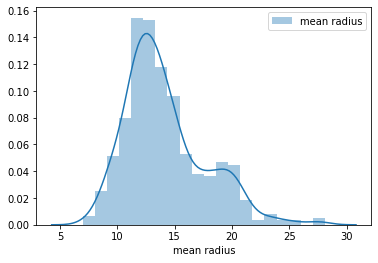

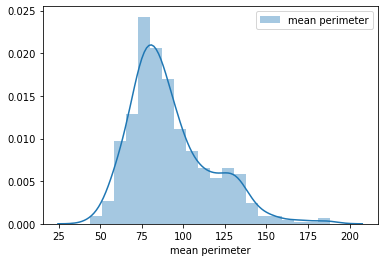

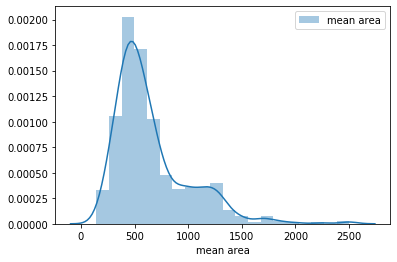

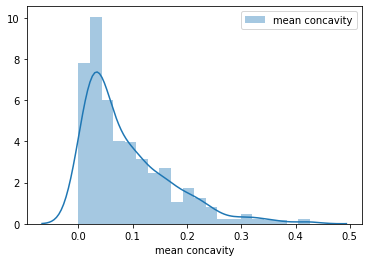

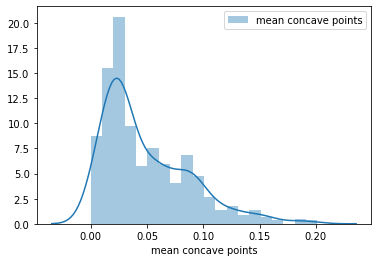

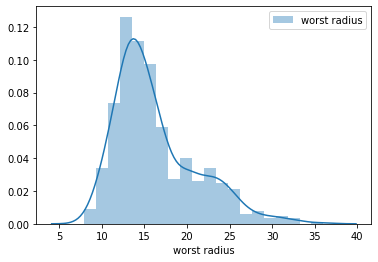

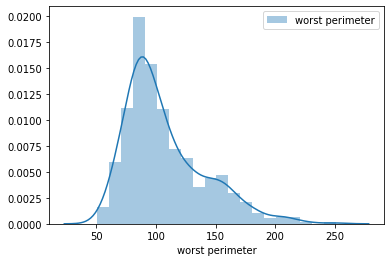

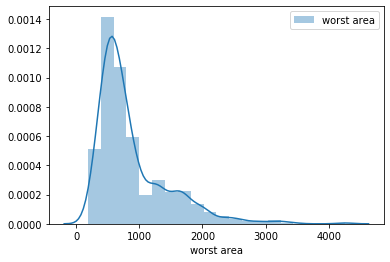

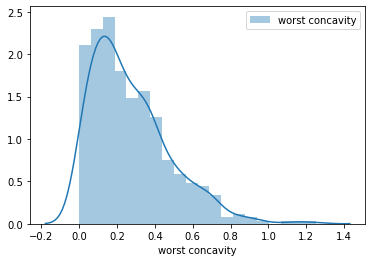

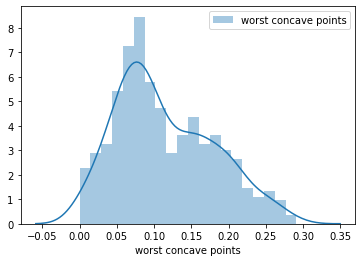

In [16]:
for val in final_data.drop(['Cancer'], axis = 1):
    sns.distplot(df[val], kde = True,bins=20,label=val)
    plt.legend()
    plt.show()

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean radius           569 non-null    float64
 1   mean perimeter        569 non-null    float64
 2   mean area             569 non-null    float64
 3   mean concavity        569 non-null    float64
 4   mean concave points   569 non-null    float64
 5   worst radius          569 non-null    float64
 6   worst perimeter       569 non-null    float64
 7   worst area            569 non-null    float64
 8   worst concavity       569 non-null    float64
 9   worst concave points  569 non-null    float64
 10  Cancer                569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


In [18]:
X2 = final_data.drop(['Cancer'], axis = 1) # Independet Feature
y = final_data['Cancer'] # Target

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
min_max = MinMaxScaler()


X = sc.fit_transform(X2)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 4)

In [20]:
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [21]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
predictions = clf.predict(X_test)

In [23]:
print(metrics.classification_report(y_test, predictions))
print("SVM Accuracy on Test data is %s" %metrics.accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.91      0.95       117
           1       0.84      0.96      0.90        54

    accuracy                           0.93       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.94      0.93      0.93       171

SVM Accuracy on Test data is 0.9298245614035088
